# Ford GoBike System User Analysis
## by Brent Murphy

## Investigation Overview

> This investigation of the Ford GoBike System will examine the users of the rideshare system and their riding characteristics Specifically when do users ride and is there a difference between the riders habits. 

## Dataset Overview

> This dataset consists of 3,017,675 records gathered from Amazon AWS from 2017 to April of 2019. This data comes from the Ford GoBike bike rideshare system covering the San Francisco and San Jose area. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass, these users are known as subscribers. The bikes can also be rented with out a subscription and those users are known as customers. This analysis will show who makes up the subscribers and customers and how they utilize the bikes in the system.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [16]:
# load in the dataset into a pandas dataframe
df_cleaned = pd.read_csv('fordgobike_clean.csv')
df_cleaned.shape

(3017675, 29)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Who are the users of GoBike bikeshare?

> There are 2 types of users for GoBike, subscribers and customers. These users are gender identified as male, female, and other. The gender makeup of subscribers and customers is nearly identical.

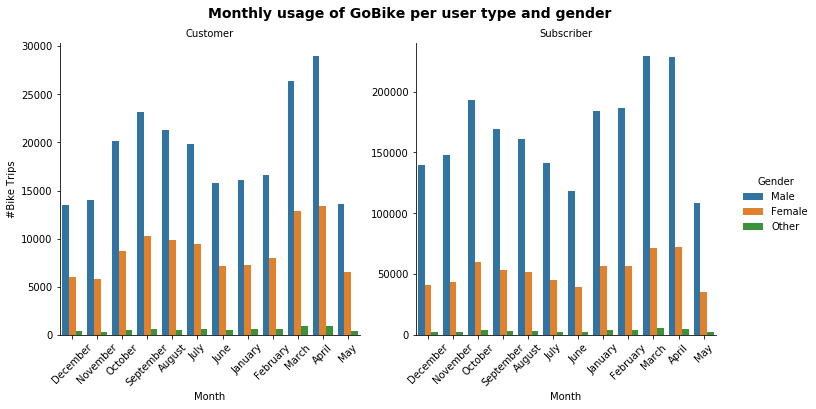

In [3]:
g = sb.catplot(data=df_cleaned, x='start_time_month', col="user_type", hue="member_gender", kind='count', sharey = False)
g.set_axis_labels("Month", "#Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage of GoBike per user type and gender', y=1.03, fontsize=14, fontweight='semibold');
g.set_xticklabels(rotation=45);

## Usage by hour

> When analyzing the data the traditional "rush hour" time, 7-9 AM and 4-6 PM, tend to be the busiest times for the GoBike bike share system.

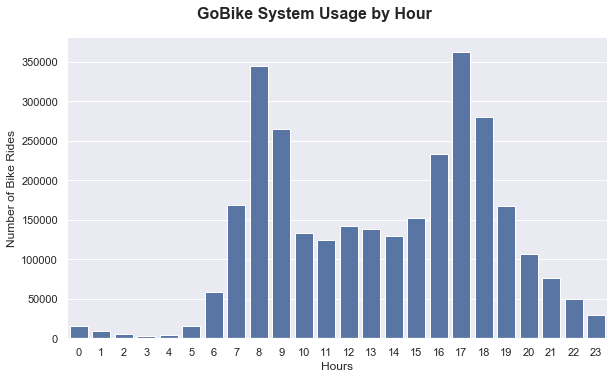

In [8]:
no_color = sb.color_palette()[0]

g = sb.catplot(data = df_cleaned, x='start_time_hour', kind='count', color = no_color, aspect = 1.7)

g.set_axis_labels('Hours', 'Number of Bike Rides')

g.fig.suptitle('GoBike System Usage by Hour', y=1.05, fontsize=16, fontweight='bold');

## Usage by weekday

> It is no surprise that the busiest days for GoBike are Monday thru Friday. GoBike looks to be popular with people commuting to work and school.

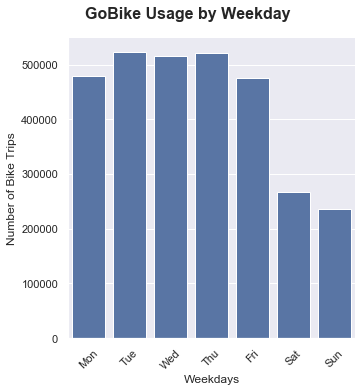

In [9]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

g = sb.catplot(data=df_cleaned, x='start_time_weekday', kind='count', color = no_color, order = weekday)

g.set_axis_labels('Weekdays', 'Number of Bike Trips')

g.fig.suptitle('GoBike Usage by Weekday', y=1.05, fontsize=16, fontweight='bold');

g.set_xticklabels(rotation=45);

## Customers travel farther?

> One surprise I found was that even though customers participate less in the rideshare than subscribers, they tend to keep bikes longer.


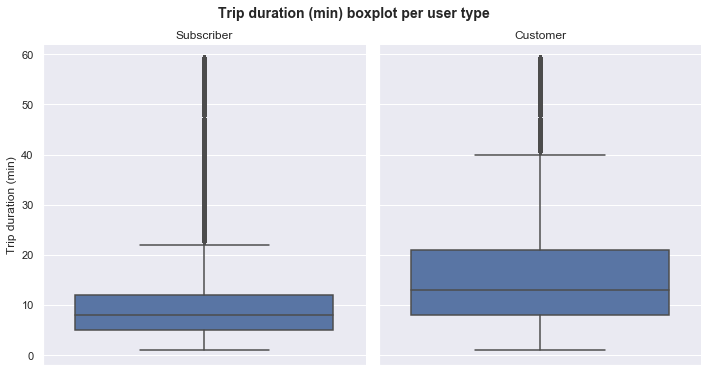

In [14]:
base_color = sb.color_palette()[0]

data = df_cleaned.query('duration_minutes < 60')
g = sb.catplot(data=data, y='duration_minutes', col="user_type", kind='box',
            color = base_color)
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Trip duration (min)")
g.fig.suptitle('Trip duration (min) boxplot per user type', y=1.03, fontsize=14, fontweight='semibold');

## Subscribers follow patterns

> Subscribers follow a pattern, they use the rideshare more Monday thru Friday between 7-9 AM and 4-6 PM. While customers follow the same pattern during the week but use the rideshare more on Saturday and Sunday. This suggests subscribers are commuters by nature while customers tend to be those who use the ridshare on weekends or for fun.

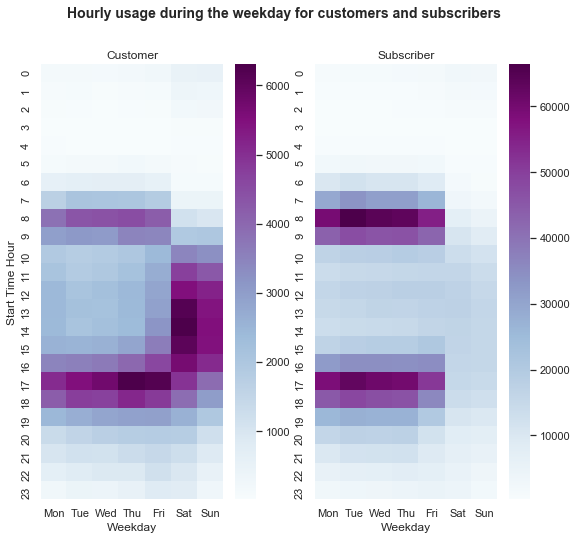

In [15]:
import matplotlib.pyplot as plt

# Setting the weekday order
df_cleaned['start_time_weekday'] = pd.Categorical(df_cleaned['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df_cleaned.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_customer, cmap="BuPu")

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_cleaned.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_subscriber, cmap="BuPu")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!